In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Создадим множество точек на плоскости (2 признака), каждая точка
# будет относиться к одному из классов (+1, красные, или -1 – желтые).

def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

In [5]:
# Напишем вспомогательную функцию, которая будет возвращать решетку
# для дальнейшей визуализации.

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [6]:
print('Построение разделительной линии при помощи дерева\n'
      '--------------------------------------------------------------------')

Построение разделительной линии при помощи дерева
--------------------------------------------------------------------


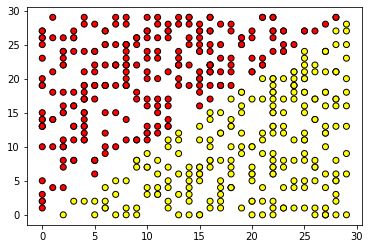

In [7]:
X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

smth


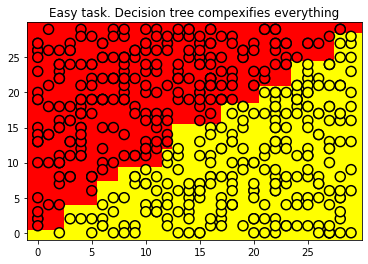

In [8]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)

predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');
# --------------------------------------------------------------------

In [9]:
print('Построение разделительной линии при помощи knn\n'
      '--------------------------------------------------------------------')

Построение разделительной линии при помощи knn
--------------------------------------------------------------------


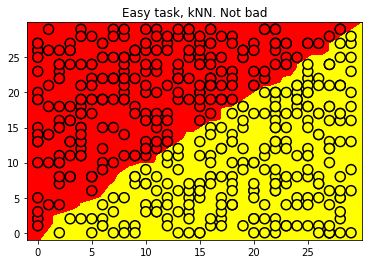

In [10]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task, kNN. Not bad');
